# Solusi untuk Knight Tour menggunakan Algoritma Warnsdorff

## Permasalahan:
Jika sebuah bidak kuda diletakkan pada sebarang kotak untuk kemudian melakukan perjalanan (dengan cara pergerakan kuda) mengunjungi ke semua (8 x 8) kotak papan catur.<br><br>

Jika diinginkan situasi bahwa kuda tsb dapat:


a. Mengakhiri perjalanan pada attacking square (closed tour)

b. Mengakhiri perjalanan di sebarang kotak (open tour)


<br>
Maka aplikasikan algoritma untuk menyelesaikan masalah di atas ke dalam sebuah program dengan menunjukkan rute perjalanan seperti gambar kanan bawah.

## Solusi
Dalam pemecahan masalah Knight's Tour, gerakan bidak kuda dalam permainan catur dapat digambarkan dengan menggunakan konsep graf. Solusi dari masalah ini adalah dengan menggunakan algoritma Warnsdorff's. <br> <br>

Algoritma Warnsdorff adalah pendekatan heuristik untuk menyelesaikan masalah Knight's Tour pada papan catur. Algoritma ini beroperasi dengan memilih langkah berikutnya bagi bidak kuda berdasarkan jumlah gerakan minimum yang mungkin dari kotak tujuan tersebut, yang disebut 'degree'. Dengan memprioritaskan langkah-langkah yang mempertahankan fleksibilitas gerakan maksimum, algoritma ini secara signifikan mengurangi waktu dan upaya yang dibutuhkan untuk menemukan solusi dibandingkan dengan pendekatan brute-force. Meski efisien dan relatif sederhana, algoritma ini tidak menjamin penemuan closed tour dan dalam beberapa kasus bisa terjebak sebelum menyelesaikan tour.

### Import Libraries and setup board
Menyiapkan board dan inisialisasi variabel yang diperlukan. Board adalah kotak 8x8 di mana setiap sel dimulai sebagai belum dikunjungi, ditandai dengan -1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initialization of Board matrix
board = [[-1 for i in range(8)] for i in range(8)]

### Fungsi Utilitas
Menentukan fungsi utilitas yang penting untuk algoritma Knight's Tour. Ini termasuk fungsi untuk memeriksa gerakan yang valid, menghitung derajat gerakan, dan mencetak papan.

In [2]:
def is_valid_move(x, y, board):
    return (x >= 0 and y >= 0) and (x < 8 and y < 8) and board[x][y] == -1

def get_degree(board, x, y):
    degree = 0
    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]
    for i in range(8):
        new_x = x + move_x[i]
        new_y = y + move_y[i]
        if is_valid_move(new_x, new_y, board):
            degree += 1
    return degree

### Implementasi Algoritma Warnsdorff
Menerapkan algoritma heuristik Warnsdorff untuk memilih gerakan selanjutnya bagi The Knights, dengan memprioritaskan gerakan yang mengarah ke sel dengan gerakan maju yang lebih sedikit.

In [3]:
def next_move(board, start_x, start_y):
    min_deg_idx = -1
    c = float('inf')
    move_x = [2, 1, -1, -2, -2, -1, 1, 2]
    move_y = [1, 2, 2, 1, -1, -2, -2, -1]
    for i in range(8):
        new_x = start_x + move_x[i]
        new_y = start_y + move_y[i]
        if is_valid_move(new_x, new_y, board) and c > get_degree(board, new_x, new_y):
            min_deg_idx = i
            c = get_degree(board, new_x, new_y)
    if min_deg_idx == -1:
        return None
    new_x = start_x + move_x[min_deg_idx]
    new_y = start_y + move_y[min_deg_idx]
    board[new_x][new_y] = board[start_x][start_y] + 1
    return (new_x, new_y)

### Main Function
Menentukan fungsi utama untuk menyelesaikan Knight's Tour menggunakan fungsi utilitas dan heuristik.

In [4]:
def knight_tour():
    board[0][0] = 0  # Knight is initially at the first block
    curr_x = 0
    curr_y = 0
    for i in range(63):
        move = next_move(board, curr_x, curr_y)
        if move is None:
            print('Solution does not exist!')
            return None
        curr_x, curr_y = move
    return board

### Visualisai Rute Perjalanan
Fungsii untuk menampilkan Knight's Tour secara visual di papan catur.

In [5]:
def visualize_tour(board):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xticks(np.arange(0.5, 8, 1))
    ax.set_yticks(np.arange(0.5, 8, 1))
    ax.grid(which='both')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.invert_yaxis()

    # Draw the squares on the chessboard
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=True, color='white'))
            else:
                ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=True, color='gray'))

    # Draw the knight's path
    path = np.array([(i, j) for i in range(8) for j in range(8) if board[i][j] != -1])
    order = [board[i][j] for i in range(8) for j in range(8) if board[i][j] != -1]
    path = path[np.argsort(order)]
    ax.plot(path[:,0], path[:,1], linestyle='-', color='red', marker='o', markersize=10, markerfacecolor='blue')
    for i in range(len(path)):
        ax.text(path[i,0], path[i,1], str(i), color='black', ha='center', va='center')

    plt.show()

### Eksekusi Penyelesaian beserta Visualisasinya

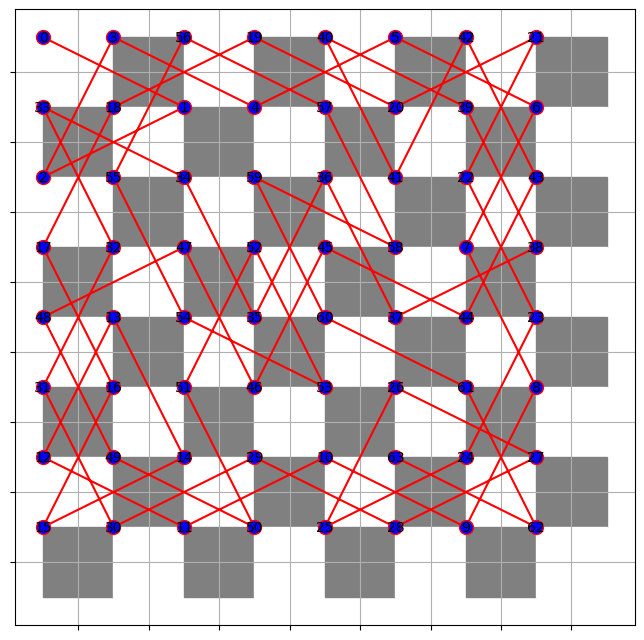

In [6]:
board = knight_tour()
if board:
    visualize_tour(board)

## Kesimpulan
Solusi yang diterapkan menunjukkan bahwa aturan Warnsdorff dapat menyelesaikan masalah Knight's Tour secara efektif. Visualisasi tersebut memberikan gambaran yang jelas tentang jalan ksatria.